# Basic performance stats for a single asset
#### Authour: Prof. Gustavo Soares

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### BQNT

If you are using BQNT you should import and initialize the BQL service:

In [2]:
import bql
bq = bql.Service()

Grab the IBOV index and the CDI rate time series like this:

In [3]:
start_date = '2007-12-31'
end_date = pd.to_datetime('today')
bbg_tickers = ['IBOV Index', 'BZACCETP Index']
fields = {'price' : bq.data.px_last(fill='PREV', start=start_date, end=end_date)}
req = bql.Request(bbg_tickers, fields)
res = bq.execute(req)
df = bql.combined_df(res).drop('CURRENCY', 1).pivot_table(index='DATE', columns= 'ID')
df.columns = ['Ibov', 'CDI']
df.to_csv('IBOV_time_series.csv') # This is if you want to save it in a .csv file
df.head()

,Ibov,CDI
DATE,,
2007-12-31,18.10445,63886.1
2008-01-01,18.10445,63886.1
2008-01-02,18.11202,62815.1
2008-01-03,18.11959,62892.0
2008-01-04,18.12715,61036.6


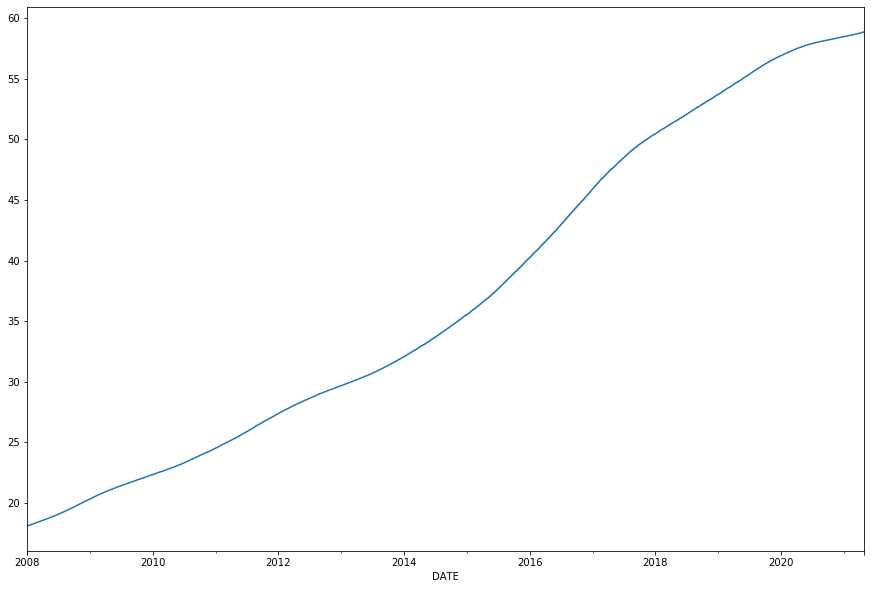

In [6]:
df['Ibov'].plot(figsize=(15,10))

#### Returns

###### Daily returns

In [48]:
daily_geometric_returns = df.pct_change(1)
daily_log_returns = np.log(df).diff(1)
daily_geometric_excess_returns = (1 + daily_geometric_returns.iloc[:,1])/(1 + daily_geometric_returns.iloc[:,0]) - 1
daily_log_excess_returns = daily_log_returns.iloc[:,1] - daily_log_returns.iloc[:,0]

###### Annualized average daily excess returns

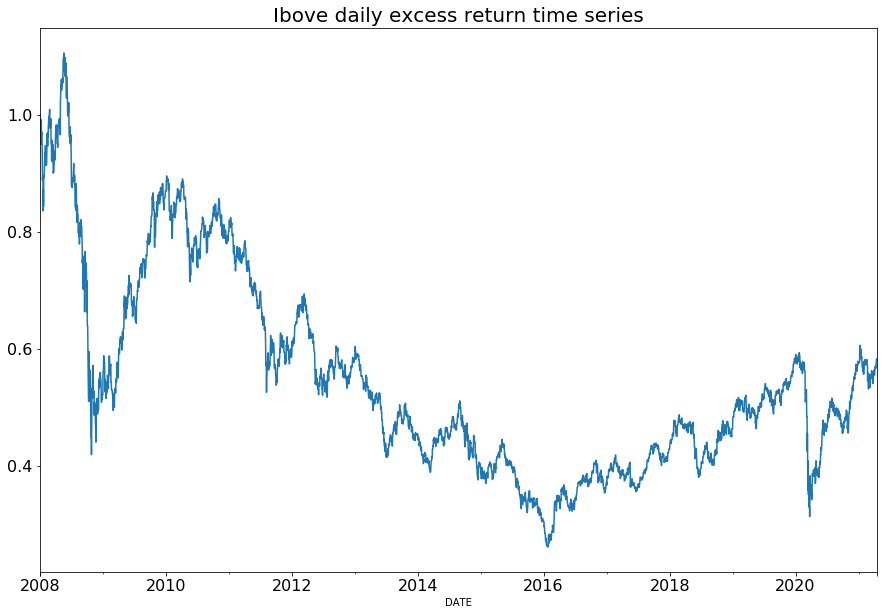

The average annualized excess return of the IBOV index between 2007-12-31 and 2021-04-15 is -2.76%
The average annualized excess log return of the IBOV index between 2007-12-31 and 2021-04-15 is -2.80%


In [51]:
p = (1 + daily_geometric_excess_returns.fillna(0)).cumprod()
p.plot(figsize=(15,10), fontsize=16)
plt.title('Ibove daily excess return time series', fontsize=20)
plt.show()
T = daily_geometric_excess_returns.shape[0] - 1.
er = (p.iloc[-1]/p.iloc[0]) ** (252 / T)-1
t0 = p.index[0].strftime('%Y-%m-%d')
t1 = p.index[-1].strftime('%Y-%m-%d')
print(f'The average annualized excess return of the IBOV index between {t0} and {t1} is {er:.2%}')
p2 = np.exp(daily_log_excess_returns.fillna(0).cumsum())
er2 = daily_log_excess_returns.mean() * 252.
print(f'The average annualized excess log return of the IBOV index between {t0} and {t1} is {er2:.2%}')

###### Monthly returns

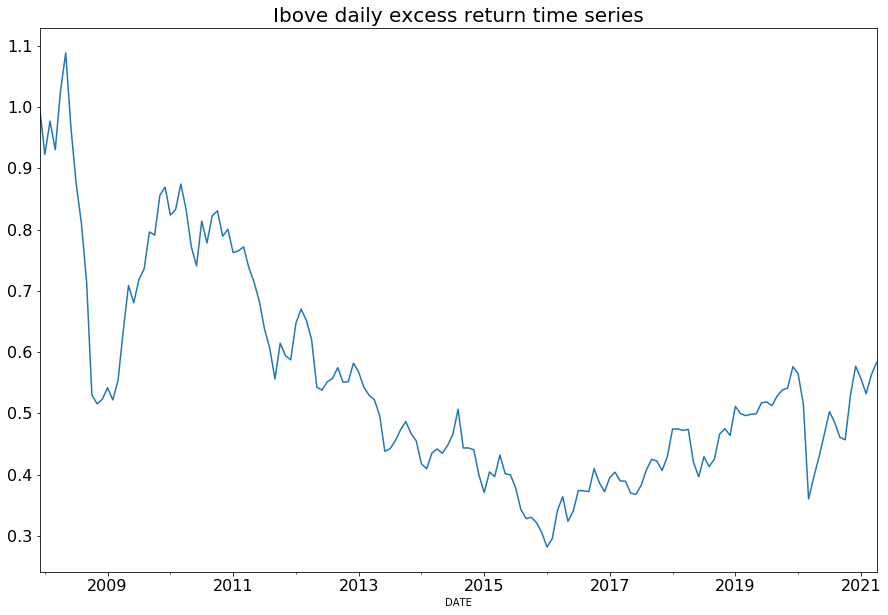

The average annualized excess return of the IBOV index between 2007-12-31 and 2021-04-30 is -3.97%
The average annualized excess log return of the IBOV index between 2007-12-31 and 2021-04-30 is -4.05%


In [57]:
monthly_geometric_returns = df.resample('M').last().pct_change(1)
monthly_log_returns = np.log(df.resample('M').last()).diff(1)
monthly_geometric_excess_returns = (1 + monthly_geometric_returns.iloc[:,1])/ (1 + monthly_geometric_returns.iloc[:,0]) - 1
monthly_log_excess_returns = monthly_log_returns.iloc[:,1] - monthly_log_returns.iloc[:,0]
p = (1 + monthly_geometric_excess_returns.fillna(0)).cumprod()
p.plot(figsize=(15,10), fontsize=16)
plt.title('Ibove daily excess return time series', fontsize=20)
plt.show()
T = p.shape[0] - 1
er = (p.iloc[-1]/p.iloc[0]) ** (12 / T) - 1
t0 = p.index[0].strftime('%Y-%m-%d')
t1 = p.index[-1].strftime('%Y-%m-%d')
print(f'The average annualized excess return of the IBOV index between {t0} and {t1} is {er:.2%}')
p2 = np.exp(monthly_log_excess_returns.fillna(0).cumsum())
er2 = monthly_log_excess_returns.mean() * 12.
print(f'The average annualized excess log return of the IBOV index between {t0} and {t1} is {er2:.2%}')

#### Volatility

In [63]:
p = (1 + daily_geometric_excess_returns.fillna(0)).cumprod()
dvol = np.log(p).diff(1).std()*np.sqrt(252)
print(f'The daily excess return vol of the IBOV index is {dvol:.2%}')
mvol = np.log(p.resample('W').last()).diff(1).std()*np.sqrt(52)
print(f'The weekly excess return vol of the IBOV index is {mvol:.2%}')
mvol = np.log(p.resample('M').last()).diff(1).std()*np.sqrt(12)
print(f'The monthly excess return vol of the IBOV index is {mvol:.2%}')
mvol2 = np.log(p).diff(21).std()*np.sqrt(12)
print(f'The rolling monthly excess return vol of the IBOV index is {mvol2:.2%}')

The daily excess return vol of the IBOV index is 23.63%
The weekly excess return vol of the IBOV index is 26.34%
The monthly excess return vol of the IBOV index is 24.56%
The rolling monthly excess return vol of the IBOV index is 22.05%


#### Sharpe and Sortino ratios

In [69]:
p = (1 + daily_geometric_excess_returns.fillna(0)).cumprod()
er = (p.iloc[-1]/p.iloc[0]) ** (252 / (p.shape[0]-1)) - 1
dvol = np.log(p).diff(1).std()*np.sqrt(252)
print(f'The Sharpe the IBOV index is {(er/dvol):.2f}')
er2 = daily_log_excess_returns.mean() * 252.
print(f'The Sharpe the IBOV index is {(er2/dvol):.2f}')
negvol = daily_log_excess_returns[daily_log_excess_returns<0].std() * np.sqrt(252)
print(f'The Sortino ratio of the IBOV index is {(er2/negvol):.2f}')

The Sharpe the IBOV index is -0.12
The Sharpe the IBOV index is -0.12
The Sortino ratio of the IBOV index is -0.13


#### Drawdowns

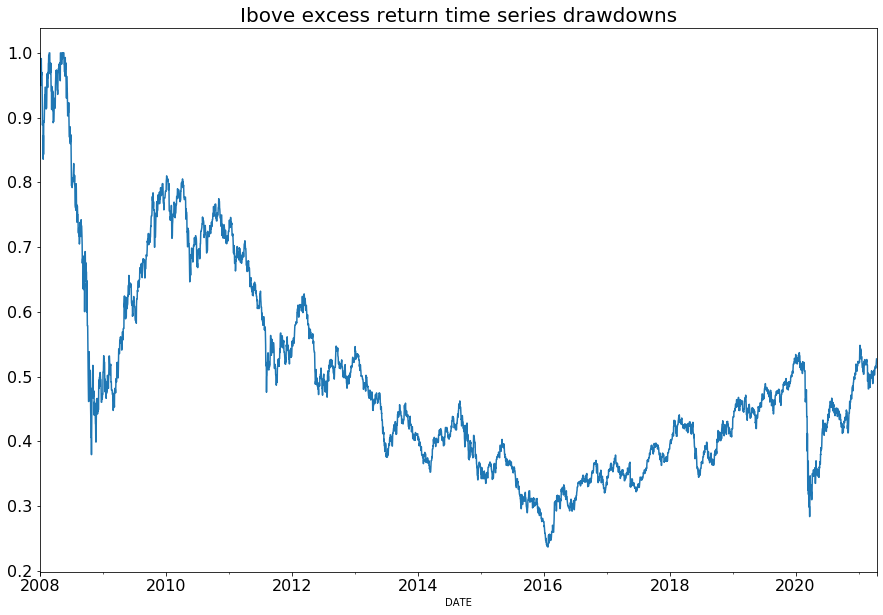

In [71]:
max2here = p.expanding(min_periods=1).max()
dd2here = p/max2here
dd2here.plot(figsize=(15,10), fontsize=16)
plt.title('Ibove excess return time series drawdowns', fontsize=20)
plt.show()

### Exercise:
Calcualte other performance metrics like:

* [Calmar ratio](https://en.wikipedia.org/wiki/Calmar_ratio)
* [Omega ratio](https://en.wikipedia.org/wiki/Omega_ratio)
* [Value at risk](https://en.wikipedia.org/wiki/Value_at_risk)
* Returns skewness
* Returns kurtosis